<a href="https://colab.research.google.com/github/Yven42/DataScience/blob/main/Assignment_2_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: recommender System

In [ ]:
#get data from GitHub -> https://github.com/keuperj/DATA
!git clone https://github.com/keuperj/DATA.git

fatal: destination path 'DATA' already exists and is not an empty directory.


## Code from the lecture

In [ ]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


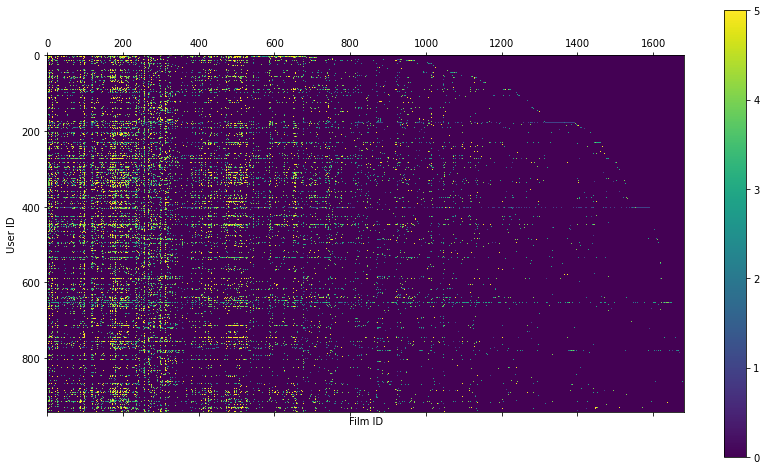

In [ ]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

#N = np.random.rand(100,100)
#N = N*5

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(R)
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()

In [ ]:
epsilon=0.0000001 
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b)+epsilon) #added epsilon for numerical stability: avoiding div by zero -> NaN

In [ ]:
%%time
#again, implementation not efficient: better use lamda opperators 
D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D[i,j]=CosineDist(R[:,i],R[:,j])

CPU times: user 2min 41s, sys: 397 ms, total: 2min 42s
Wall time: 3min


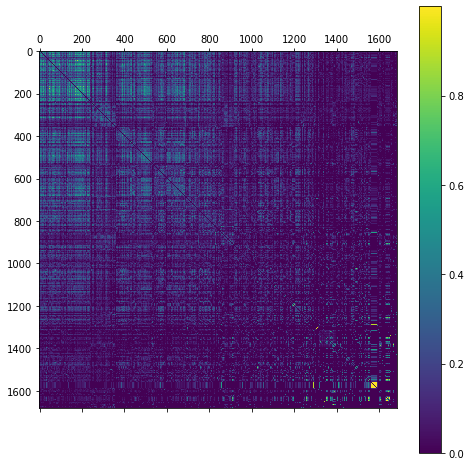

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D)
plt.colorbar() 

In [ ]:
def getTopN(movie_id, D, N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title, D):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title),D))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

###Cosine-Distance
$d_{cos}(\vec{a},\vec{b})=\frac{<\vec{a},\vec{b}>}{|\vec{a}||\vec{b}|}$

In [ ]:
epsilon=0.0000001 
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b)+epsilon) #added epsilon for numerical stability: avoiding div by zero -> NaN

###Euclidean-Distance
$d_{euc}(\vec{a},\vec{b})=\sqrt{(\vec{b_0}-\vec{a_0})^2+(\vec{b_1}-\vec{a_1})^2}$

In [ ]:
from scipy.spatial import distance
#from math import sqrt
def EuclideanDist(a,b):
    return  distance.euclidean(a,b)#np.linalg.norm(a-b)

###Testing

In [ ]:
%%time
#again, implementation not efficient: better use lamda opperators 
D_euc=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_euc[i,j]=EuclideanDist(R[:,i],R[:,j])


CPU times: user 2min 1s, sys: 307 ms, total: 2min 2s
Wall time: 2min 4s


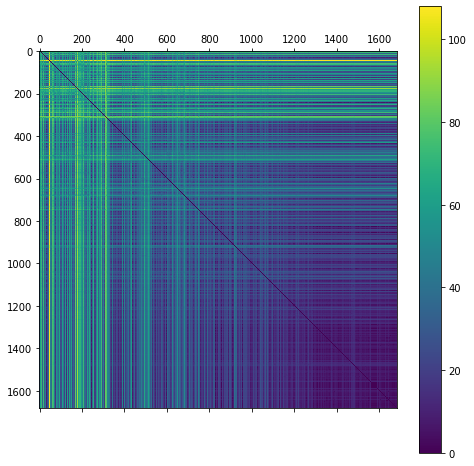

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D_euc)
plt.colorbar() 

In [ ]:
CII("Star",D)

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
126              Godfather, The (1972)
Name: title, dtype: object

In [ ]:
CII("Star",D_euc)

recommending movies for: 'Star Wars (1977)'


989              Anna Karenina (1997)
1061    Four Days in September (1997)
1126          Truman Show, The (1998)
937        Smile Like Yours, A (1997)
1242               Night Flier (1997)
Name: title, dtype: object

## 4.2 Baseline Results
Implement and compare results of two very simple baseline methods 


###Random Recommendation
* random recommendations: randomly recommend 5 movies (HINT user np.random sub-library to generate random movie IDs)

In [ ]:
IDs_max = np.shape(movies)[0]
R_IDs = np.random.rand(5)*IDs_max
R_N = getNameByID(R_IDs)
R_N

1108            Death and the Maiden (1994)
64       What's Eating Gilbert Grape (1993)
1003    Geronimo: An American Legend (1993)
1594                        Shopping (1994)
1565        Man from Down Under, The (1943)
Name: title, dtype: object

recommending movies for: 'Star Wars (1977)'


275                              Leaving Las Vegas (1995)
259                                  Event Horizon (1997)
674     Nosferatu (Nosferatu, eine Symphonie des Graue...
1088                       Speed 2: Cruise Control (1997)
689                           Seven Years in Tibet (1997)
Name: title, dtype: object

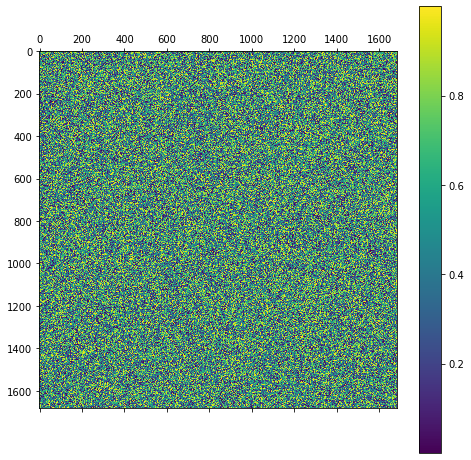

In [ ]:
D_rand = np.random.rand(np.shape(movies)[0],np.shape(movies)[0])

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D_rand)
plt.colorbar() 

CII("Star",D_rand)

In [ ]:
from sklearn.model_selection import train_test_split

R_train, R_test = train_test_split(R, test_size=0.1)

In [ ]:
D_cos=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_cos[i,j]=CosineDist(R_train[:,i],R_train[:,j])

In [ ]:
D_euc=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_euc[i,j]=EuclideanDist(R_train[:,i],R_train[:,j])

In [ ]:
D_ran=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_ran[i,j]=np.random.rand(1)*100

In [ ]:
np.argsort(R_test[23])[-5:]

array([194, 198, 199, 175,   0])

####Results

2.0261052631578953

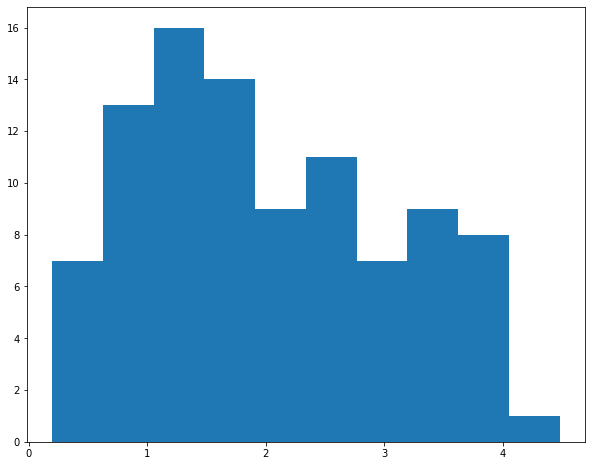

In [ ]:
test_res=test_Score(D_cos,R_test)
plt.hist(test_res)
np.mean(test_res)

1.3570526315789475

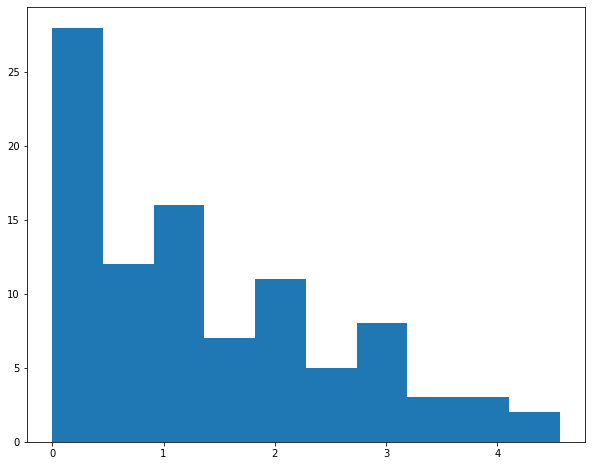

In [ ]:
test_res=test_Score(D_euc,R_test)
plt.hist(test_res)
np.mean(test_res)

0.2290526315789474

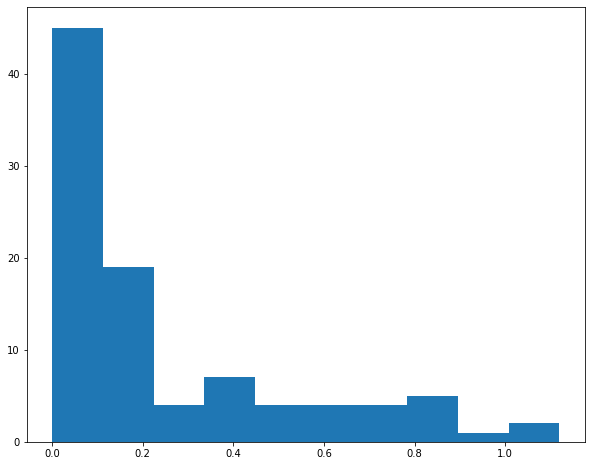

In [ ]:
test_res=test_Score(D_ran,R_test)
plt.hist(test_res)
np.mean(test_res)

###Always Recommending
* always recommending the top 5 movies: HINT: need to find the IDs of the top 5 movies over all users first

In [203]:
#R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]
mov = np.zeros((np.shape(movies)[0]))

for i in range(0,np.shape(movies)[0]):
  counter = 0
  cache = 0
  for j in range(0,np.shape(users)[0]):
        if R[j,i]!=0:
          counter += 1
          cache += R[j,i]
  mov[i] = cache/counter

mov_dic = dict(enumerate(mov.flatten(), 1))

mov_dic


marklist = sorted(mov_dic.items(), key=lambda x:x[1], reverse=True)
sortdict = dict(marklist)
Name = getNameByID()


#print(sortdict)


#mov_ranking.sort()

ID = 49
Name = getNameByID(ID)
R_Top5_IDs = getTopN(ID, D, 5)
R_Top5 = getNameByID(R_Top5_IDs)
R_Top5
sortdict

{814: 5.0,
 1122: 5.0,
 1189: 5.0,
 1201: 5.0,
 1293: 5.0,
 1467: 5.0,
 1500: 5.0,
 1536: 5.0,
 1599: 5.0,
 1653: 5.0,
 1449: 4.625,
 119: 4.5,
 1398: 4.5,
 1594: 4.5,
 1642: 4.5,
 408: 4.491071428571429,
 318: 4.466442953020135,
 169: 4.466101694915254,
 483: 4.45679012345679,
 114: 4.447761194029851,
 64: 4.445229681978798,
 603: 4.3875598086124405,
 12: 4.385767790262173,
 50: 4.3584905660377355,
 178: 4.344,
 513: 4.333333333333333,
 1191: 4.333333333333333,
 1639: 4.333333333333333,
 134: 4.292929292929293,
 963: 4.2926829268292686,
 427: 4.292237442922374,
 357: 4.291666666666667,
 98: 4.28974358974359,
 480: 4.284916201117318,
 127: 4.283292978208232,
 285: 4.265432098765432,
 272: 4.262626262626263,
 251: 4.260869565217392,
 657: 4.259541984732825,
 474: 4.252577319587629,
 174: 4.252380952380952,
 479: 4.251396648044692,
 1064: 4.25,
 1125: 4.25,
 1524: 4.25,
 313: 4.2457142857142856,
 511: 4.23121387283237,
 641: 4.212121212121212,
 484: 4.2101449275362315,
 172: 4.2043596730

## 4.3 SVD
Implement the SVD approach using *Surprise* (see lab intro)
* compare the results


In [ ]:
import surprise
!pip install scikit-surprise
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
import pandas as pd

#read raw data
r_cols = ['movie_id', 'rating', 'user_id']
ratings = pd.read_csv('DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")
#need to re-order columns
ratings=ratings[['movie_id',  'user_id','rating']]
# Load the movielens-100k dataset (download it if needed),
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings,reader)
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)
# We'll use the famous SVD algorithm.
algo = SVD()
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

predictions = algo.test(testset)


# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9900


,movie_id,user_id,rating
196,242,881250949,3
186,302,891717742,3
22,377,878887116,1
244,51,880606923,2
166,346,886397596,1
...,...,...,...
880,476,880175444,3
716,204,879795543,5
276,1090,874795795,1
13,225,882399156,2


In [ ]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[iid].append((uid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[iid] = user_ratings[:n]

    return top_n

In [ ]:
get_top_n(predictions,5)

defaultdict(list,
            {885478218: [(12, 4.267238199652722),
              (515, 4.180580754454795),
              (423, 3.6096768978592557)],
             877807816: [(919, 3.758669269843289), (1028, 3.2708253890110757)],
             879446639: [(32, 3.9881925508671743)],
             891250060: [(234, 4.066787833285652)],
             882399419: [(553, 3.3323064880748223)],
             883875041: [(135, 4.02514186009389)],
             878738386: [(176, 3.779144256240005)],
             878709365: [(248, 3.859132719301326), (1388, 3.647560472829975)],
             891208356: [(174, 4.3560666315468275), (863, 3.7586046303454266)],
             879444473: [(493, 4.0199927794184545)],
             875289566: [(1284, 3.0683968013089338)],
             879456507: [(934, 2.740745213715076)],
             883388354: [(746, 3.6458784652927667)],
             885165619: [(269, 4.112114483641716)],
             881433605: [(51, 3.414356221110025)],
             891208492: [(172, 4.176